# Importing required Modules and Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Loading the Red Wine Dataset

In [7]:
#importing the base ball dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv('Base_Ball.csv')

checking the first five rows of the dataset in order to get general idea of features and variables.

checking the input variables and output variables.

the head() function used to view the preview of the data for given number of rows,if no value 

is given then bydefault it will display first five rows

In [8]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Exploring the Datase

Once the importing of the dataset is done,we get the rough idea of the dataset as below-- 

this dataset contains features necessary to check the quality of the red wine. 

so here "W" is the dependent or output variable. it is the time to make 

complete "Exploratory Data Analysis i.e. EDA" Let's start it with checking the number

of rows and columns in the given Dataset-->

In [9]:
df.shape

(30, 17)

this dataset contains 30 rows and 17 columns. Now lets check the name of all the

columns this dataset have so that it is easy for us to -- --view the names of columns in easier

way and make further analysis on them-->

In [10]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases,
    
    Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

- Output: Number of predicted wins (W)

In the above output we can clearly see the names of all columns. now by observing the dataset

and column names it is clear that feature "W" is dependent-- --variable and all other 

features are independent. For further analysis we have to check the datatypes of values of each 

column-->

In [11]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# Checking the Missing Values in Dataset

from above output,it is clearly visible that all the values of each column are either 

float type-- or integer type. one thing to be noticed here is that only output variable 

is in integer type ,all other variables-- --are in float type. Now lets check for sum of 

the missing values in each column-->

In [12]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

that's great ,we have no null values in the given dataset,it makes our job easy...isn't it?

# Statistical summary of the Dataset

now lets see the summary of the statistics of the dataset pertaining to the dataset columns,

like mean,median,mode,standard deviation and IQR values. as the whole dataset is numeric so no

need to worry for the dropping of any column as below function- --only works on numerical data

In [13]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Oultliers Detection

Plotting the boxplots for detecting the outliers

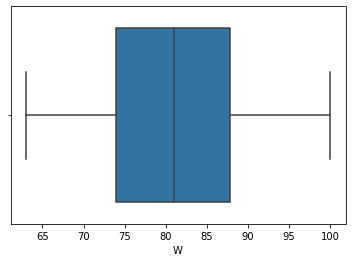

In [15]:
sns.boxplot(df["W"])

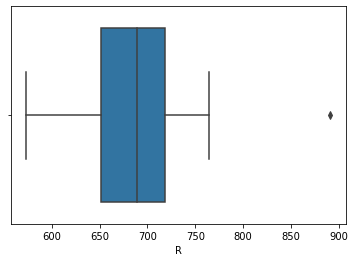

In [16]:
sns.boxplot(df['R'])

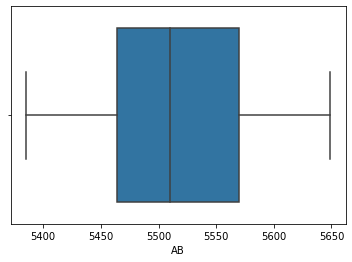

In [17]:
sns.boxplot(df["AB"])

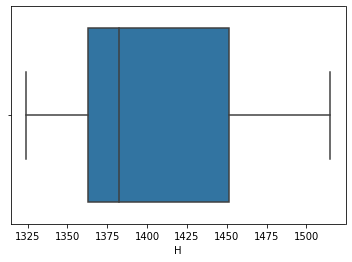

In [18]:
sns.boxplot(df["H"])

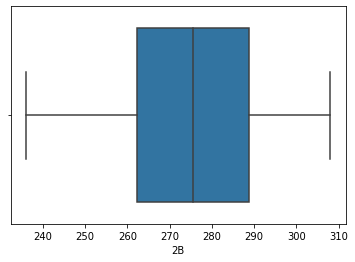

In [19]:
sns.boxplot(df['2B'])

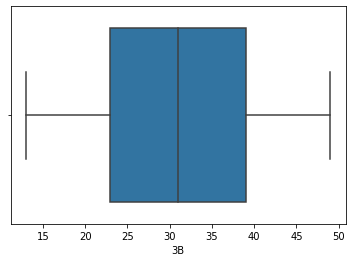

In [20]:
sns.boxplot(df['3B'])

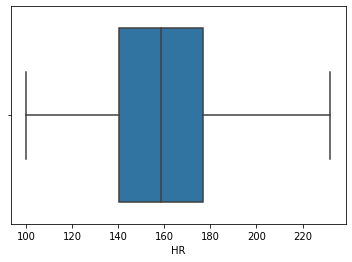

In [21]:
sns.boxplot(df["HR"])

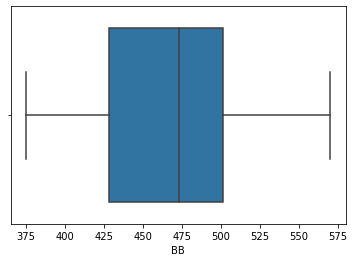

In [22]:
sns.boxplot(df["BB"])

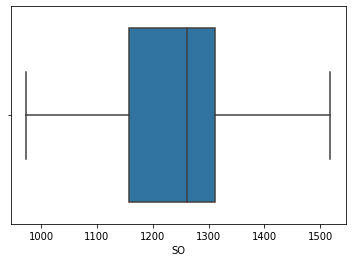

In [23]:
sns.boxplot(df["SO"])

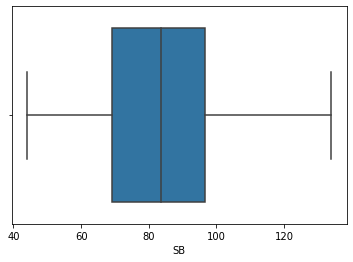

In [24]:
sns.boxplot(df["SB"])

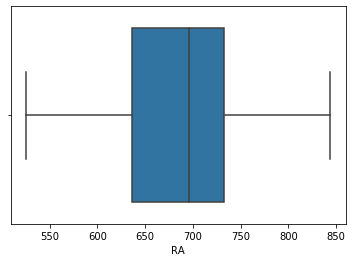

In [25]:
sns.boxplot(df["RA"])

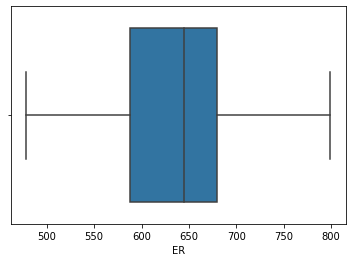

In [26]:
sns.boxplot(df["ER"])

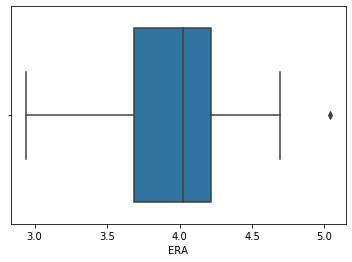

In [27]:
sns.boxplot(df["ERA"])

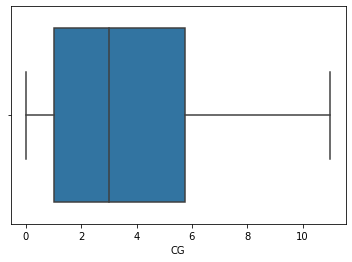

In [28]:
sns.boxplot(df["CG"])

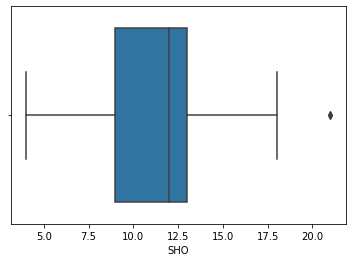

In [30]:
sns.boxplot(df["SHO"])

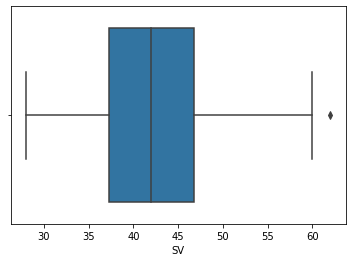

In [31]:
sns.boxplot(df['SV'])

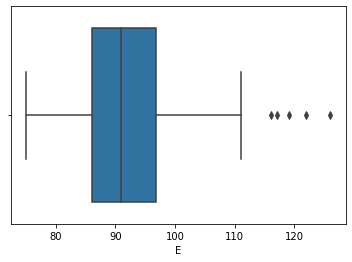

In [32]:
sns.boxplot(df["E"])

So we found the outliers in columns 'R','ERA','SHO','SV' and 'E'

# Removal of Outliers

"R" column

In [33]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.R.quantile(0.25)
q3 = df.R.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.R >= lower_bound) & (df.R <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df)))

Samples in dataset with outliers: 30
Samples in dataset without outliers: 29


"ERA" column

In [34]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.ERA.quantile(0.25)
q3 = df.ERA.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.ERA >= lower_bound) & (df.ERA <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df)))

Samples in dataset with outliers: 29
Samples in dataset without outliers: 29


"SHO" column

In [35]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.SHO.quantile(0.25)
q3 = df.SHO.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.SHO >= lower_bound) & (df.SHO <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df)))

Samples in dataset with outliers: 29
Samples in dataset without outliers: 27


"SV" column

In [36]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.SV.quantile(0.25)
q3 = df.SV.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.SV >= lower_bound) & (df.SV <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df)))

Samples in dataset with outliers: 27
Samples in dataset without outliers: 25


"E" column

In [37]:
print("Samples in dataset with outliers: {}".format(len(df)))
q1 = df.E.quantile(0.25)
q3 = df.E.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df.loc[(df.E >= lower_bound) & (df.E <= upper_bound)]
print("Samples in dataset without outliers: {}".format(len(df)))

Samples in dataset with outliers: 25
Samples in dataset without outliers: 20


In [38]:
df.shape

(20, 17)

After the removal of the outliers....our Dataset has been reduced to

20 rows

17 columns

# Checking Skewness in the Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224A4DC8CC8>,
      dtype=object)

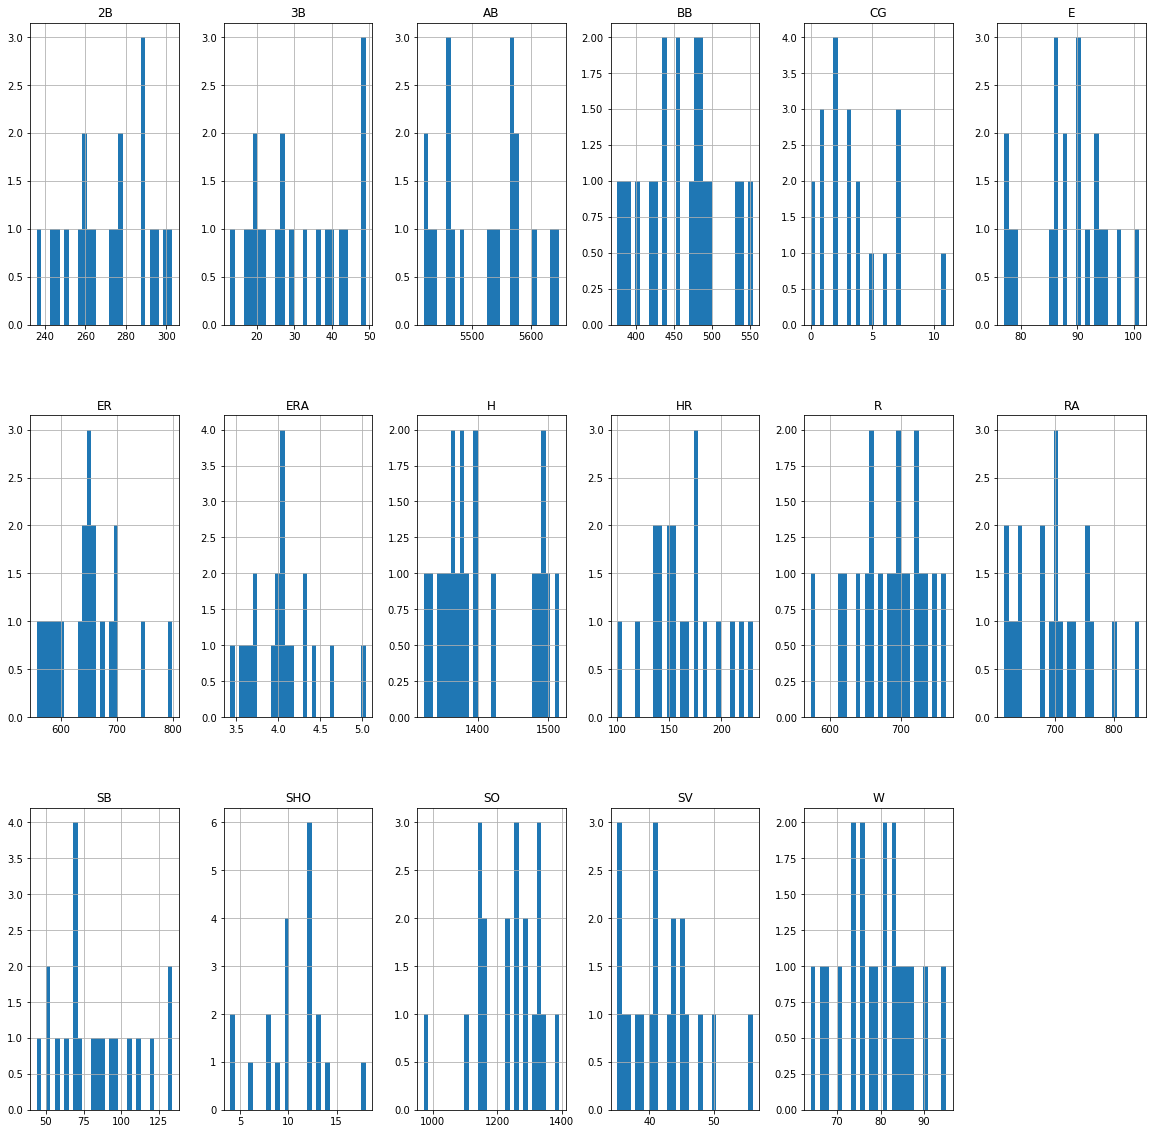

In [39]:
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

From above visualization we can clearly observe that there is no data skewed.

Hence removal of skewness is not required.

# Correlation Analysis

In [40]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.535833,-0.028666,-0.015688,0.466087,-0.172859,0.310097,0.157470,-0.145667,-0.284301,-0.750745,-0.721990,-0.736345,-0.009454,0.280154,0.728984,-0.157481
R,0.535833,1.000000,0.483634,0.422218,0.544958,0.203533,0.621018,0.225600,0.177860,0.013466,-0.073313,-0.026963,-0.049197,-0.032475,-0.143357,0.259560,0.013531
AB,-0.028666,0.483634,1.000000,0.785883,0.501330,0.494096,0.056133,-0.001157,-0.056341,0.349535,0.371159,0.406950,0.342218,0.005867,-0.123811,0.010159,0.224455
H,-0.015688,0.422218,0.785883,1.000000,0.539406,0.687335,-0.222015,-0.174686,-0.353949,0.421657,0.302863,0.368746,0.349123,0.191010,0.023728,-0.103959,-0.094539
2B,0.466087,0.544958,0.501330,0.539406,1.000000,0.349730,-0.028969,0.301393,-0.158952,0.175440,-0.181240,-0.182795,-0.211372,0.415925,0.131245,0.245453,-0.053325
3B,-0.172859,0.203533,0.494096,0.687335,0.349730,1.000000,-0.331586,-0.494268,-0.166779,0.560083,0.397549,0.444676,0.437247,0.024513,-0.067658,-0.233287,-0.162837
HR,0.310097,0.621018,0.056133,-0.222015,-0.028969,-0.331586,1.000000,0.295241,0.634661,-0.167856,-0.102877,-0.079008,-0.099938,-0.097181,-0.130951,0.112007,0.084665
BB,0.157470,0.225600,-0.001157,-0.174686,0.301393,-0.494268,0.295241,1.000000,0.284515,-0.095742,-0.233378,-0.281092,-0.304859,0.309716,0.113153,0.052366,0.028153
SO,-0.145667,0.177860,-0.056341,-0.353949,-0.158952,-0.166779,0.634661,0.284515,1.000000,-0.039941,0.073776,0.029923,0.010416,-0.046080,0.063745,-0.311596,0.048066
SB,-0.284301,0.013466,0.349535,0.421657,0.175440,0.560083,-0.167856,-0.095742,-0.039941,1.000000,0.100068,0.133858,0.119558,-0.002002,-0.035221,-0.324987,-0.213970


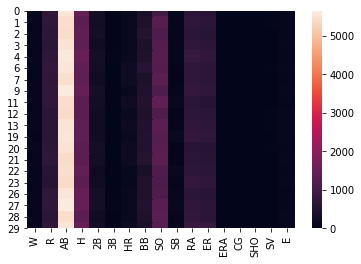

In [42]:
sns.heatmap(df)

# Univariate and Bivariate Analysis

visualize the relationship between the features and the response using scatterplots

this produces pairs of scatterplot as shown

use aspect= to control the size of the graphs

use kind='reg' to plot linear regression on the grap

In [43]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

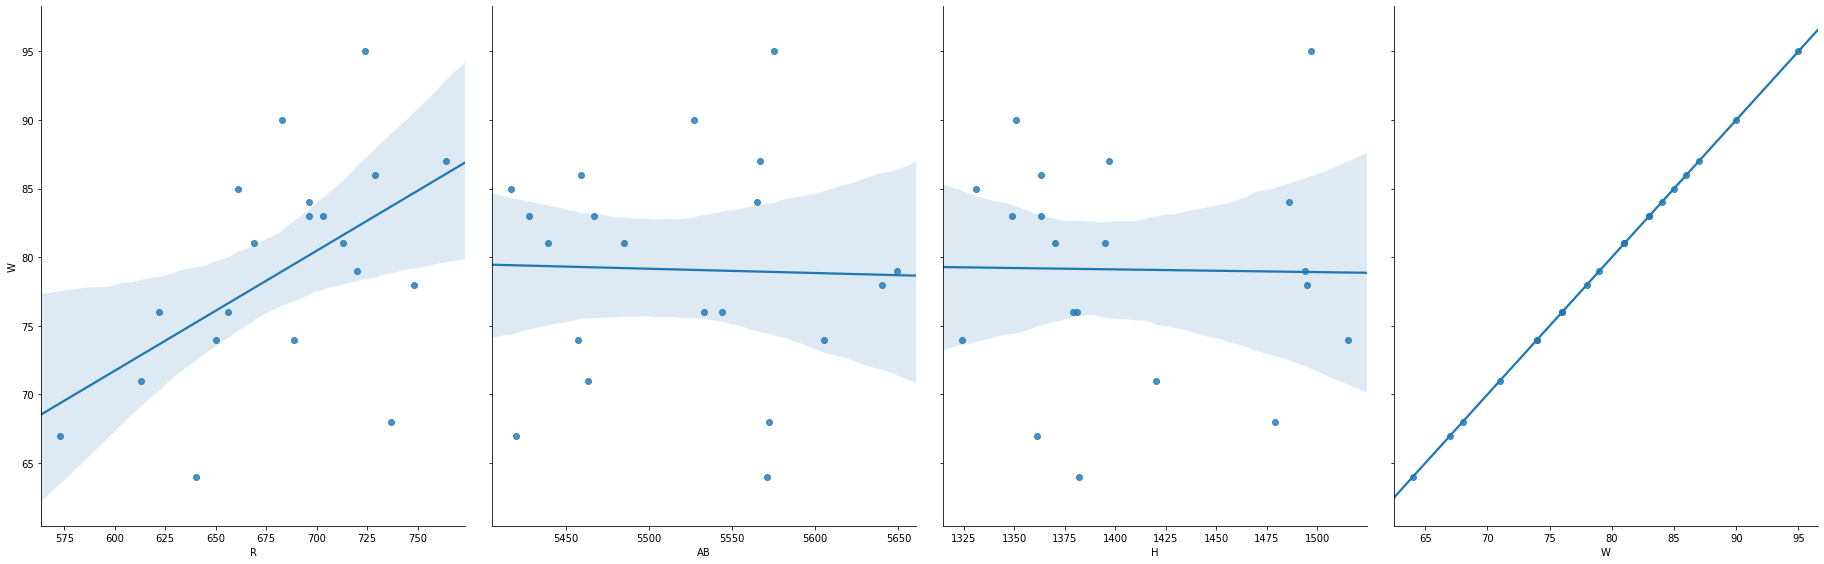

In [50]:
sns.pairplot(df,x_vars=['R','AB','H','W'],y_vars='W',size=8,aspect=.8,kind='reg')

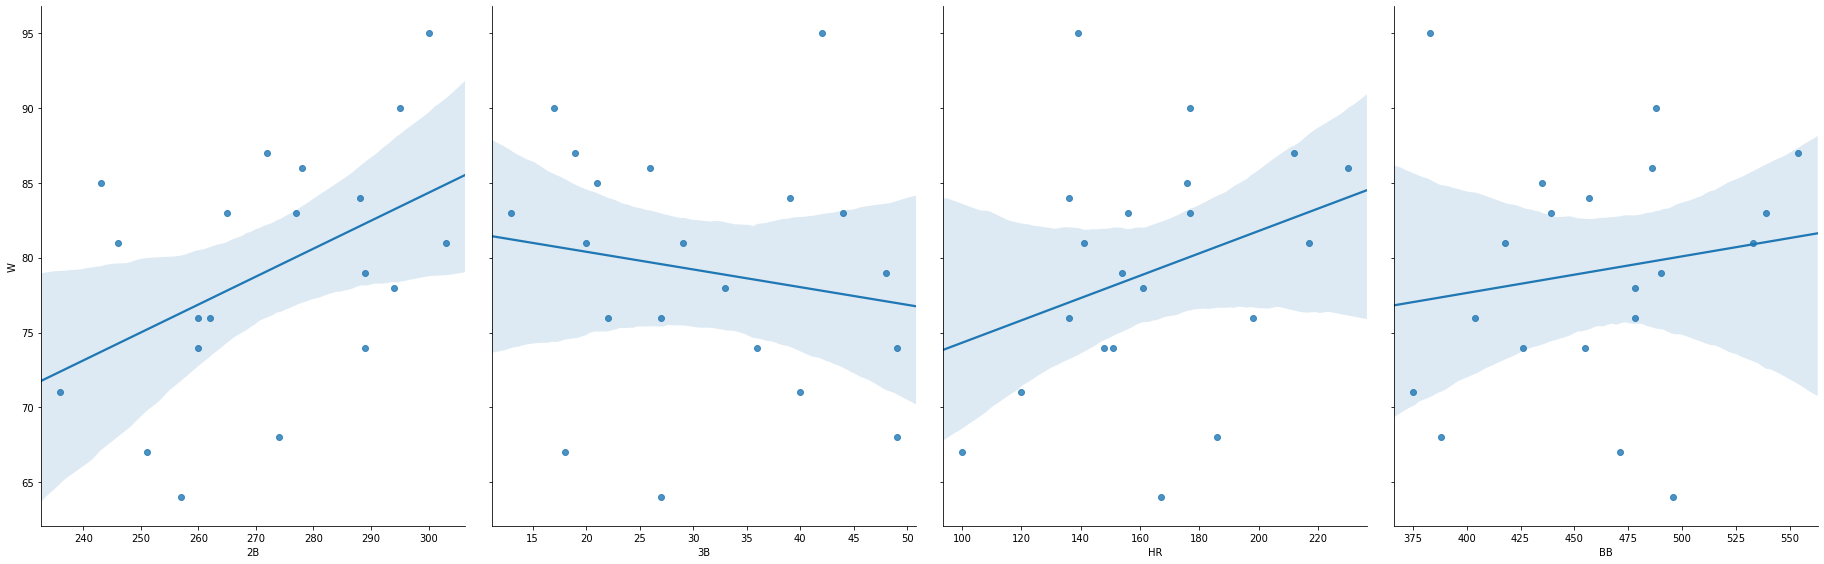

In [51]:
sns.pairplot(df,x_vars=['2B','3B','HR','BB'],y_vars='W',size=8,aspect=.8,kind='reg')

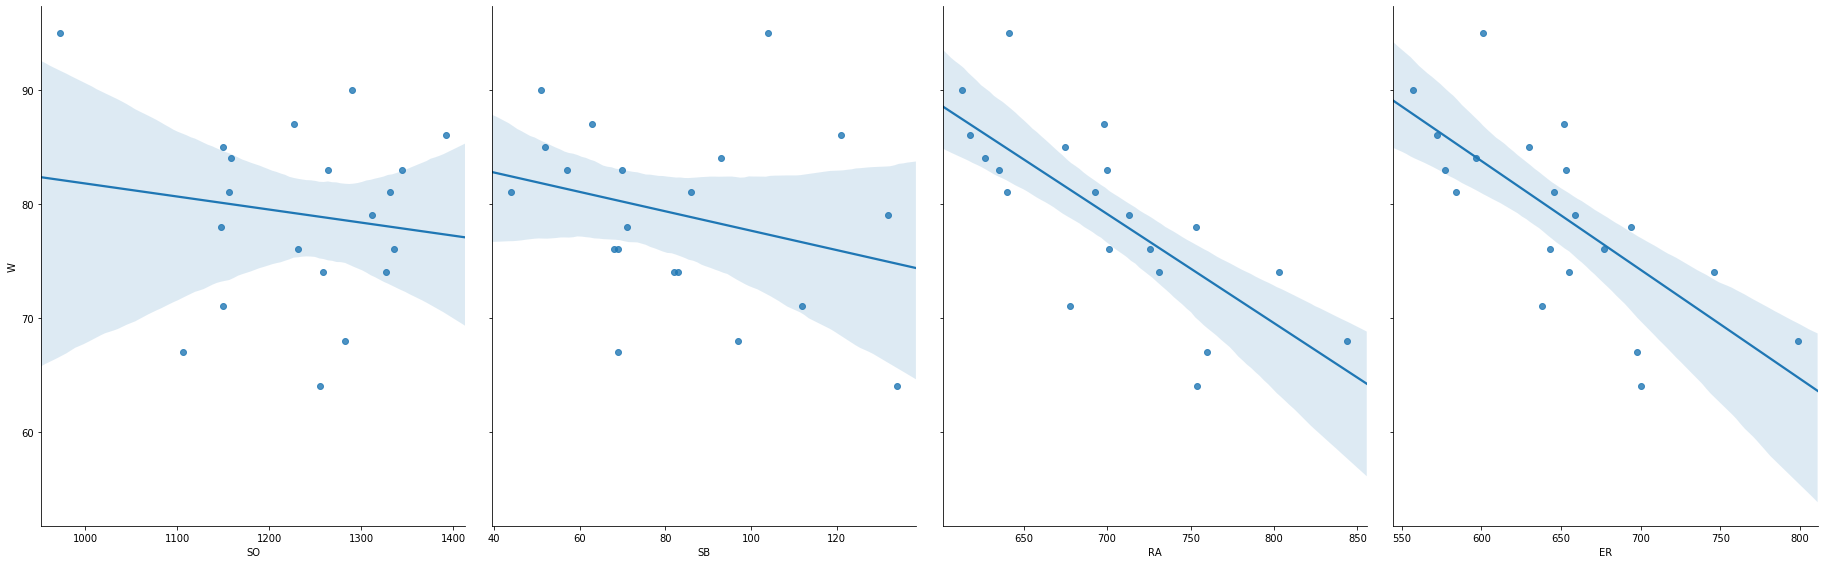

In [52]:
sns.pairplot(df,x_vars=['SO','SB','RA','ER'],y_vars='W',size=8,aspect=.8,kind='reg')

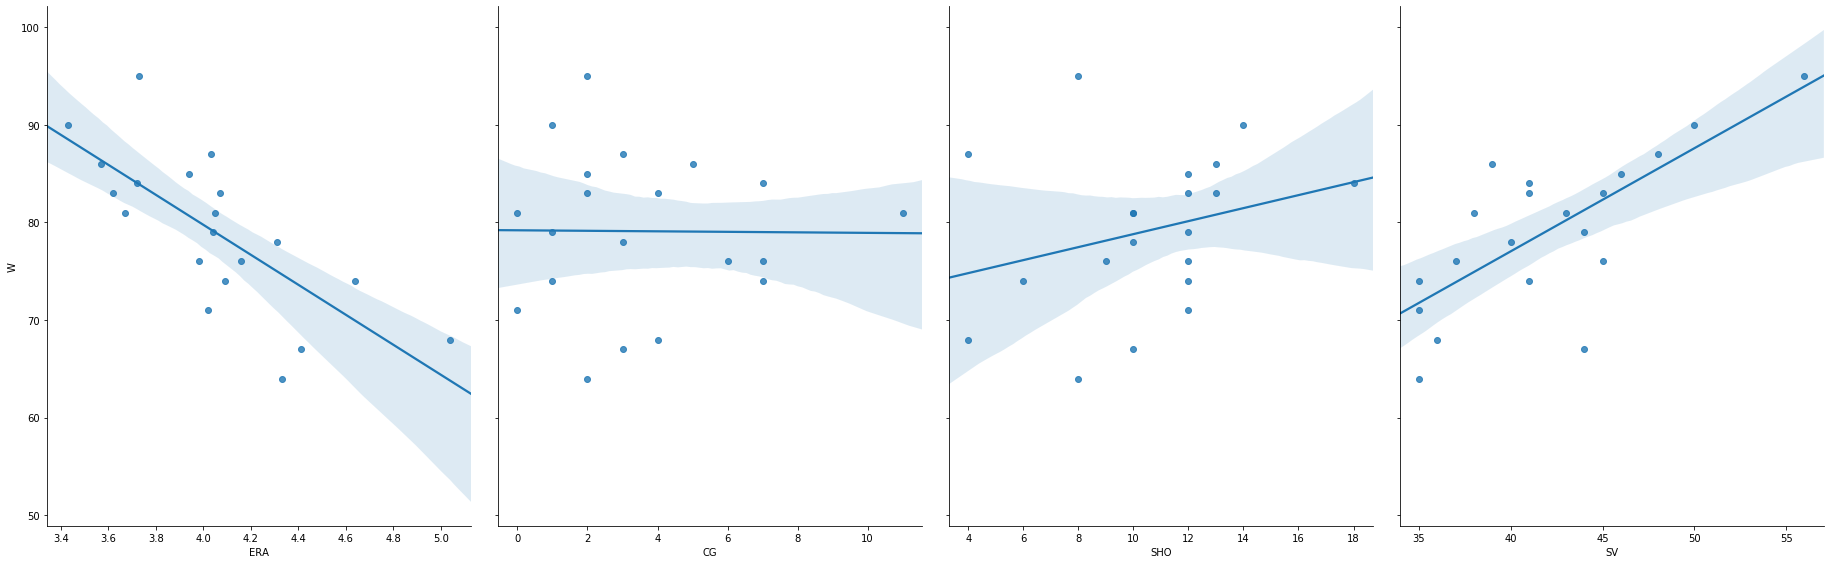

In [53]:
sns.pairplot(df,x_vars=['ERA','CG','SHO','SV'],y_vars='W',size=8,aspect=.8,kind='reg')

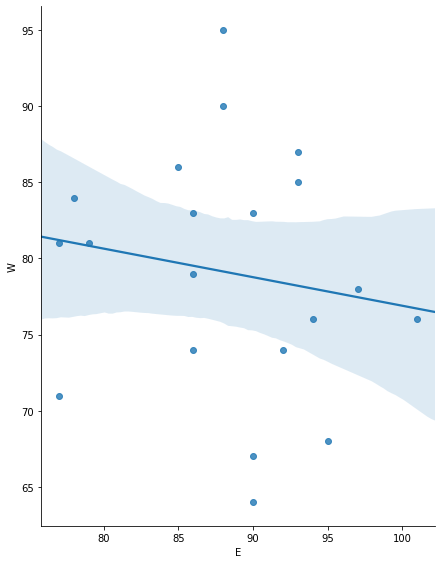

In [54]:
sns.pairplot(df,x_vars=['E'],y_vars='W',size=8,aspect=.8,kind='reg')

Good relationship between 'W'(wins) and 'R'(runs),'SV'(saves)

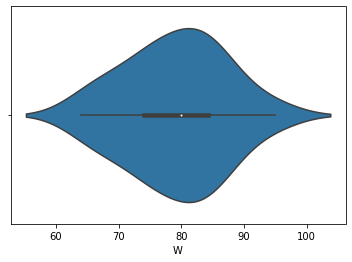

In [55]:
#plotting the graph for visualizing better the distribution of "W" variable.
sns.violinplot(x='W', data=df)

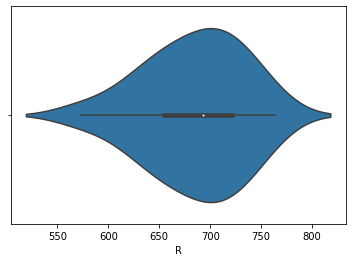

In [56]:
#plotting the graph for visualizing better the distribution of "R" variable.
sns.violinplot(x='R', data=df)

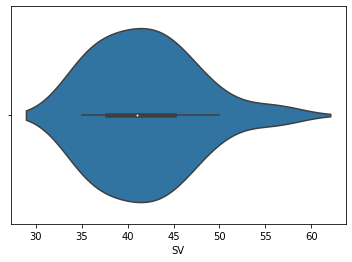

In [57]:
#plotting the graph for visualizing better the distribution of "SV" variable.
sns.violinplot(x='SV', data=df)

# Feature Engineering

In [59]:
df.shape

(20, 17)

In [60]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [65]:
x=df.drop('W',axis=True)

In [66]:
x.shape

(20, 16)

In [67]:
y=df['W']

In [68]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [69]:
y.shape

(20,)

In [70]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# Divide the dataset into training and testing set

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 64)

In [216]:
# default split is 75% for training and 25% for testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 16)
(4, 16)
(16,)
(4,)


# Using Standard Scaling for making Data Standardized

In [217]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Selection

The characteristics of the given problem are:

Regression: The target variable is a quantity.

Small dataset: Less than 100K samples.

Few features should be important: The correlation matrix indicates that a few features contain the information to predict the target variable.

This characteristic makes the following methods most promising: Ridge Regression, Support Vector Regression, Ensemble Regressor, Random Forest Regressor.

Overview Metrics Mean Squared Error (MSE)

Root Mean Squared Logarithmic Error (RMSLE) RMSLE

R2 Score

We will evaluate the performance of these models in the following:

In [222]:
from sklearn.metrics import r2_score
model= [
    Lasso(alpha=0.1),
    Ridge(alpha=.5),
    
    RandomForestRegressor( random_state=0, n_estimators=100)
]
 

In [223]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('mean absolute error ',(mean_absolute_error(y_test,pred)))
    print('mean squared error ',(mean_squared_error(y_test,pred)))
    print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))
    print(r2_score(y_test,pred))
    print('\n')

mean absolute error  1.5638708216217587
mean squared error  3.7298255862428134
root mean squared error  1.9312756370448039
0.9547899928940266


mean absolute error  1.3750000000000036
mean squared error  3.059615666458106
root mean squared error  1.7491757105728705
0.9629137494974775


mean absolute error  4.924999999999997
mean squared error  32.57834999999997
root mean squared error  5.707744738510997
0.6051109090909095




# Linear Regression

In [224]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
pred_lr=lr.predict(x_test)

1.0


In [225]:
print('mean absolute error ',(mean_absolute_error(y_test,pred_lr)))
print('mean squared error ',(mean_squared_error(y_test,pred_lr)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred_lr)))

mean absolute error  2.281517394451569
mean squared error  8.416312911403573
root mean squared error  2.9010882288209667


In [226]:
print(r2_score(y_test,pred_lr))

0.8979840859223809


In [242]:
# Now lets try to do some evaluation for linear regressor using cross validation.
lr_eval = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 4)
lr_eval.mean()

0.16541406602151174

# Hyper Parameter Tuning

As we see above scores, the minimum error is given by 'Random Forest Regressor'

So we will choose Randon Forest Regressor for further improvement

In [227]:
rf=RandomForestRegressor(n_estimators=400,random_state=0)

In [228]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [229]:
rf.score(x_train,y_train)

0.9076697237254343

In [230]:
pred=rf.predict(x_test)
pred

array([83.5225, 83.23  , 80.835 , 73.015 ])

In [231]:
print('mean absolute error ',(mean_absolute_error(y_test,pred)))
print('mean squared error ',(mean_squared_error(y_test,pred)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error  4.774374999999999
mean squared error  30.260839062499983
root mean squared error  5.500985281065564


In [232]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6332019507575759


# Cross Validation Score on Random Forest Regressor

In [233]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 4)
rfc_eval.mean()

0.2842314650225354

# Using Ensemble Technique to avoid Overfitting

# 'Using Adaboost Regressor'

In [243]:
from sklearn.ensemble import AdaBoostRegressor
adboost=AdaBoostRegressor()
adboost.fit(x_train,y_train)
print(adboost.score(x_train,y_train))
abpred=adboost.predict(x_test)
print(abpred)
adboost.score(x_test,y_test)

0.9868108343794283
[83.  81.  81.  72.5]


0.5840909090909091

In [244]:
print(r2_score(y_test,abpred))

0.5840909090909091


# Cross Validation on AdaBooster Model

In [250]:
#Now lets try to do some evaluation for random forest model using cross validation.
ada_eval = cross_val_score(estimator = adboost, X = x_train, y = y_train, cv =4)
ada_eval.mean()

0.21606564767943895

# Checking Best R2 Score 

# Ridge Technique

In [252]:
rd=Ridge(alpha=.5)

In [253]:
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
rd_pred=rd.predict(x_test)
print(rd_pred)
rd.score(x_test,y_test)

0.9871239207900843
[85.58400509 87.28246843 79.0525718  65.58095467]


0.9629137494974775

After applying so many models and testing on all models above.

The best score is coming through Ridge Model.

Checking R2 score for ridge model--

In [254]:
print(r2_score(y_test,rd_pred))

0.9629137494974775


Best R2 Score is coming through Ridge Technique== 96%

Hence saving the best predicted result and Model i.e. Ridge

# Storing the predicted results in csv file

In [255]:
rd_pred=pd.DataFrame(rd_pred,columns=['rd_pred']).to_csv('Base_Ball')

# Saving the best Model as a pickle in a file

I have selected Ridge Model as best model as it is giving me best score after

performing overfitting

In [257]:
from sklearn.externals import joblib

In [258]:
joblib.dump(adboost,'Base_Ball.pkl')

['Base_Ball.pkl']